Cluster 0 Sentiment Analysis:
Text: making lunch | Compound Score: 0.0
Text: dizzyhrvy crap took forever put together going go sleep days | Compound Score: -0.3818
Text: jnaylor kiwitweets hey jer since start twittering | Compound Score: 0.0
Text: trying quot delicious library quot mixed results bar code thought wanted add sport bra instead drill cool app tho | Compound Score: 0.7184
Text: valenvaldez oh good hear already continue holy week | Compound Score: 0.4404
Text: got list fellow hotties gon na share one amigo | Compound Score: 0.296
Text: time warsaw beer garden chilling | Compound Score: -0.0516
Text: everything lover survival everything mother survival | Compound Score: 0.5859
Text: go | Compound Score: 0.0
Text: rivensky haha well anything file rest away delete | Compound Score: 0.6249
Text: turbizzle goooooood hwo | Compound Score: 0.0
Text: focus opportunities focus money | Compound Score: 0.3818
Text: going kill right sorry feeling desperate | Compound Score: -0.7783
Text

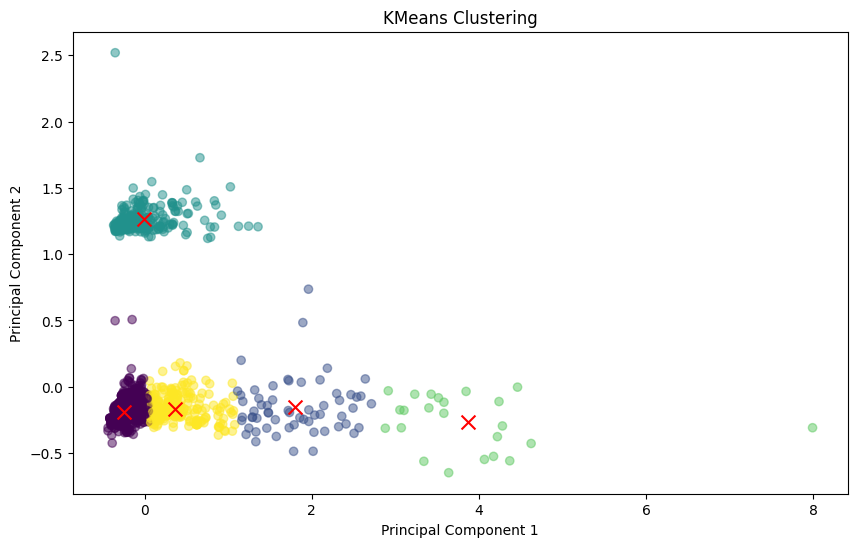

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt



data = pd.read_csv('suicide.csv')

# Drop rows with missing 'Tweet'
data.dropna(subset=['Tweet'], inplace=True)
# Sample text data
preprocessed_texts = data['Tweet'].to_list()

# Bag of Words representation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(preprocessed_texts)

X_dense = X.toarray()

#print(X_dense)
# np.savetxt('data.txt', X_dense)

# PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_dense)

# KMeans clustering
k = 5  # Number of clusters (positive vs negative sentiment)
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_pca)

# Assign sentiment labels
labels = kmeans.labels_
sentiment_labels = ['Positive' if label <= 1 else 'Negative' for label in labels]

# Output sentiment labels for each text
cluster_texts = {label: [] for label in set(labels)}
for i, text in enumerate(preprocessed_texts):
    cluster_texts[labels[i]].append(text)

sid = SentimentIntensityAnalyzer()
for label, texts in cluster_texts.items():
    print(f"Cluster {label} Sentiment Analysis:")
    for text in texts:
        scores = sid.polarity_scores(text)
        print(f"Text: {text} | Compound Score: {scores['compound']}")
    print()

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', c='red', s=100)
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
